In [4]:
##===========##
##  Imports  ##
##===========##

tom = 5

print("Hellp Jupiter!")

print("Yo")



Hellp Jupiter!


In [2]:
##====================================##
##  Config (no hard-coded variables)  ##
##====================================##

config = {
    "general" : {
        "base_seed"  : -1,
        "board_size" : 5,
    },
    "data" : {
        "input_fname"      : "combinationsSmallyyy.csv",
    },
    "model" : {
        "ndim"              : 128,
        "encoder_depth"     : 4,
        "encoder_num_heads" : 8,
        "encoder_do_MLP"    : True,
        "decoder_depth"     : 4,
        "decoder_num_heads" : 8,
        "decoder_do_MLP"    : True,
        "MLP_depth"         : 3,
        "use_bias"          : True,
        "learning_rate"     : 1e-5,
    },
    "training" : {
        "epochs"           : 500,
        "batch_size"       : 32,
        "patience"         : 20,
        "validation_split" : 0.2,
    },
}

In [3]:
##=====================##
##  Configure logging  ##
##=====================##

##  Get named logger
logger = logging.getLogger(__name__)

##  Add output handler to stdout
io_handler = logging.StreamHandler(sys.stdout)
io_handler.setFormatter(logging.Formatter("%(levelname)7s %(asctime)s: %(message)s", "%Y-%m-%d %H:%M:%S"))
io_handler.setLevel(logging.INFO)
logger.setLevel(logging.INFO)
logger.addHandler(io_handler)

##  Test that we see output
logger.info(f"Configured for logger '{logger.name}'")

NameError: name 'logging' is not defined

In [4]:
##======================================##
##  Print versions for reproducibility  ##
##======================================##

logger.info( "---------------+-----------------------------------------------------------")
logger.info( "      Package  | Version")
logger.info( "---------------+-----------------------------------------------------------")
logger.info(f"       Python  |  {sys.version}")
logger.info(f"   Matplotlib  |  {mpl.__version__}")
logger.info(f"        Numpy  |  {np.__version__}")
logger.info(f"       Pandas  |  {pd.__version__}")
logger.info(f"   Tensorflow  |  {tf.__version__}")

   INFO 2023-11-28 10:34:19: ---------------+-----------------------------------------------------------
   INFO 2023-11-28 10:34:19:       Package  | Version
   INFO 2023-11-28 10:34:19: ---------------+-----------------------------------------------------------
   INFO 2023-11-28 10:34:19:        Python  |  3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)]
   INFO 2023-11-28 10:34:19:    Matplotlib  |  3.5.1
   INFO 2023-11-28 10:34:19:         Numpy  |  1.22.0
   INFO 2023-11-28 10:34:19:        Pandas  |  1.3.5


NameError: name 'tf' is not defined

In [5]:
##==============##
##  Log config  ##
##==============##

def log_flattened_dictionary(logger     : logging.Logger,
                             dictionary : dict,
                             base_str   : str = "",
                             log_lvl    : int = logging.INFO,
                            ) -> None :
    """
    Recursively search through config dictionary provided and log all values found
    Dictionary keys must be castable to str
    """
    for key, val in dictionary.items() :
        if isinstance(val, dict) :
            log_flattened_dictionary(logger, val, base_str=f"{base_str} > {key}")
            continue
        logger.log(log_lvl, f"{base_str} > {key} : {val}")

logger.info("Using the following config values:")
log_flattened_dictionary(logger, config)


   INFO 2023-11-28 10:34:39: Using the following config values:
   INFO 2023-11-28 10:34:39:  > general > base_seed : -1
   INFO 2023-11-28 10:34:39:  > general > board_size : 5
   INFO 2023-11-28 10:34:39:  > data > input_fname : combinationsSmallyyy.csv
   INFO 2023-11-28 10:34:39:  > model > ndim : 128
   INFO 2023-11-28 10:34:39:  > model > encoder_depth : 4
   INFO 2023-11-28 10:34:39:  > model > encoder_num_heads : 8
   INFO 2023-11-28 10:34:39:  > model > encoder_do_MLP : True
   INFO 2023-11-28 10:34:39:  > model > decoder_depth : 4
   INFO 2023-11-28 10:34:39:  > model > decoder_num_heads : 8
   INFO 2023-11-28 10:34:39:  > model > decoder_do_MLP : True
   INFO 2023-11-28 10:34:39:  > model > MLP_depth : 3
   INFO 2023-11-28 10:34:39:  > model > use_bias : True
   INFO 2023-11-28 10:34:39:  > model > learning_rate : 1e-05
   INFO 2023-11-28 10:34:39:  > training > epochs : 500
   INFO 2023-11-28 10:34:39:  > training > batch_size : 32
   INFO 2023-11-28 10:34:39:  > training >

In [6]:
##==========================##
##  Configure random seeds  ##
##==========================##

##  Get base seed
base_seed = config["general"]["base_seed"]

##  If <1 then set to clock time in seconds
if base_seed < 1 :
    base_seed = int(time.time())
    logger.info(f"Setting base_seed = {base_seed}")

##  Set python seed
python_seed = base_seed
random.seed(python_seed)
logger.info(f"Python seed = {python_seed}")

##  Set numpy seed
np_seed = base_seed + 1
np.random.seed(np_seed)
logger.info(f"Numpy seed = {np_seed}")

##  Set tensorflow seed
tf_seed = base_seed + 2
tf.random.set_seed(tf_seed)
logger.info(f"Tensorflow seed = {tf_seed}")


   INFO 2023-11-28 10:34:43: Setting base_seed = 1701167683
   INFO 2023-11-28 10:34:43: Python seed = 1701167683
   INFO 2023-11-28 10:34:43: Numpy seed = 1701167684


NameError: name 'tf' is not defined

In [7]:
##===========================##
##  Read input to dataframe  ##
##===========================##

##  Resolve filename
input_fname = config["data"]["input_fname"]
logger.info(f"Reading data from file {input_fname}")

##  Load file
df = pd.read_csv(
input_fname,
)

##  Fix column heading format
df = df.T.reset_index().T.reset_index(drop=True)
df = df.set_axis(["Barrier", "Trajectory"], axis=1)

##  Log results
logger.info(f"Dataframe create with length {len(df)}:\n{str(df)}")

   INFO 2023-11-28 10:34:59: Reading data from file combinationsSmallyyy.csv


   INFO 2023-11-28 10:34:59: Dataframe create with length 6:
    Barrier                        Trajectory
0  ((0, 1))  [(0, 0), (1, 1), (0, 2), (0, 3)]
1  ((0, 1))  [(0, 0), (1, 1), (0, 2), (0, 3)]
2  ((0, 1))  [(0, 0), (1, 1), (0, 2), (0, 3)]
3  ((0, 1))  [(0, 0), (1, 1), (0, 2), (0, 3)]
4  ((0, 1))  [(0, 0), (1, 1), (0, 2), (0, 3)]
5  ((0, 1))  [(0, 0), (1, 1), (0, 2), (0, 3)]


In [ ]:
##=================================================##
##  Pull barriers and trajectories from dataframe  ##
##=================================================##

barriers     = list(df.iloc[:,0].map(lambda x : np.array(ast.literal_eval(x), dtype=np.int8)))
trajectories = list(df.iloc[:,1].map(lambda x : np.array(ast.literal_eval(x), dtype=np.int8)))


In [ ]:
##==================##
##  Create X array  ##
##==================##

##  Get board size
board_size = config["general"]["board_size"]
logger.info(f"Creating data arrays according to board_size={board_size}")

##  Create list of sequences with BEGIN and END tokens
X = []
BEG, END = np.array([[board_size+1, board_size+1]]), np.array([[board_size+2, board_size+2]])
for x in trajectories :
    if len(x.shape) == 1 :
        x = x[None, :]
    x = np.concatenate([BEG, x+1, END])
    X.append(x)

##  Pad sequences with MASK token and convert to square array
max_x = max([len(x) for x in X])
X     = np.array([np.pad(x, [[0, max_x - len(x)], [0, 0]]) for x in X])

##  Log summary
logger.info(f"Data X created with shape {X.shape}")

##  Log a few datapoints
for row_idx in range(min([5, len(X)])) :
    logger.info(f"Row at index {row_idx} is:\n{X[row_idx]}")


   INFO 2023-11-28 10:09:04: Creating data arrays according to board_size=5


INFO:__main__:Creating data arrays according to board_size=5


   INFO 2023-11-28 10:09:05: Data X created with shape (6, 6, 2)


INFO:__main__:Data X created with shape (6, 6, 2)


   INFO 2023-11-28 10:09:05: Row at index 0 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


INFO:__main__:Row at index 0 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


   INFO 2023-11-28 10:09:05: Row at index 1 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


INFO:__main__:Row at index 1 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


   INFO 2023-11-28 10:09:05: Row at index 2 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


INFO:__main__:Row at index 2 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


   INFO 2023-11-28 10:09:05: Row at index 3 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


INFO:__main__:Row at index 3 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


   INFO 2023-11-28 10:09:05: Row at index 4 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


INFO:__main__:Row at index 4 is:
[[6 6]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [7 7]]


In [ ]:
##==================##
##  Create Y array  ##
##==================##

##  Create tensor of square arrays with 0 or 1 if there is a barrier
Y = []
for barrier in barriers :
    if len(barrier.shape) == 1 :
        barrier = barrier[None, :]
    y = np.zeros((board_size, board_size))
    for pixel in barrier :
        y[pixel[0], pixel[1]] = 1
    Y.append(y)
Y = np.array(Y)

##  Log summary
logger.info(f"Data Y created with shape {Y.shape}")

##  Log a few datapoints
for row_idx in range(min([5, len(Y)])) :
    logger.info(f"Row at index {row_idx} is:\n{Y[row_idx]}")


   INFO 2023-11-28 10:09:05: Data Y created with shape (6, 5, 5)


INFO:__main__:Data Y created with shape (6, 5, 5)


   INFO 2023-11-28 10:09:05: Row at index 0 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


INFO:__main__:Row at index 0 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


   INFO 2023-11-28 10:09:05: Row at index 1 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


INFO:__main__:Row at index 1 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


   INFO 2023-11-28 10:09:05: Row at index 2 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


INFO:__main__:Row at index 2 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


   INFO 2023-11-28 10:09:05: Row at index 3 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


INFO:__main__:Row at index 3 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


   INFO 2023-11-28 10:09:05: Row at index 4 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


INFO:__main__:Row at index 4 is:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
##===================================================================##
##  Define custom keras layer for enumerating an NxN grid of pixels  ##
##===================================================================##

class EnumerateGrid(tf.keras.layers.Layer) :

    def __init__(self,
                 xmax : int,
                 ymax : int | None = None,
                 **kwargs
                ) :
        """
        Keras layer that outputs two flat tensors enumerating the x and y pixel locations on a grid
        Both output tensors have shape [B, xmax*ymax] where B is the batch dimension, evaluated at run-time
        by matching with a data tensor provided in the layer call
        """
        super().__init__(**kwargs)
        if ymax is None :
            ymax = xmax
        self.xmax = xmax
        self.ymax = ymax
        X, Y      = np.meshgrid(np.arange(xmax), np.arange(ymax))
        X, Y      = X.flatten(), Y.flatten()
        self.X    = tf.constant(X[None, :], dtype=self.dtype)
        self.Y    = tf.constant(Y[None, :], dtype=self.dtype)

    def call(self,
             x   : tf.Tensor,
            ) :
        """
        Create an output tensors with same batch dimension as input x
        First output tensor enumerates x positions on a grid
        Second output tensor enumerates y positions on a grid
        Both tensors have shape [B, xmax*ymax]
        """
        X = tf.tile(self.X, [tf.shape(x)[0], 1])
        Y = tf.tile(self.Y, [tf.shape(x)[0], 1])
        return X, Y

    def get_config(self) :
        """
        Create config dict, needed for saving model to file
        """
        config = super().get_config()
        config["amax"] = self.amax
        return config


In [ ]:
##==========================================================================##
##  Define custom keras layer for slicing the right-most index of a tensor  ##
##==========================================================================##

class RightSlice(tf.keras.layers.Layer) :

    def __init__(self,
                 index       : int,
                 expand_dims : bool = False,
                 **kwargs
                ) :
        """
        Keras layer that slices a tensor along its right-most axis and returns the index provided
        """
        super().__init__(**kwargs)
        self.index       = index
        self.expand_dims = expand_dims

    def call(self,
             x   : tf.Tensor,
            ) :
        """
        Slices x along its right-most axis and returns the index provided
        Output tensor has one fewer dimensions than x unless expand_dims is set to True
        """
        ##  Slice x
        y = x[..., self.index]

        ##  Expand dims
        if self.expand_dims :
            y = y[..., None]

        ## Return
        return y

    def get_config(self) :
        """
        Create config dict, needed for saving model to file
        """
        config = super().get_config()
        config["index"      ] = self.index
        config["expand_dims"] = self.expand_dims
        return config


In [ ]:
##====================================================##
##  Define method for creating our transformer model  ##
##====================================================##

def create_model(board_size        : int,
                 name              : str      = "Tomformer",
                 ndim              : int      = 64,
                 encoder_depth     : int      = 3,
                 encoder_num_heads : int      = 8,
                 encoder_do_MLP    : bool     = True,
                 decoder_depth     : int      = 3,
                 decoder_num_heads : int      = 8,
                 decoder_do_MLP    : bool     = True,
                 MLP_depth         : int      = 2,
                 use_bias          : bool     = True,
                 dtype                        = tf.float32,
                 dtype_in                     = tf.int8,
                 learning_rate     : float    = 1e-4,
                 loss              : str      = "binary_crossentropy",
                ) -> tf.keras.models.Model :
    """
    Create keras transformer model and compile with Adam optimiser
    """

    ##  Log model creation
    logger.info(f"Creating transformer model '{name}' with the following settings:")
    logger.info(f"          board_size: {board_size}")
    logger.info(f"                ndim: {ndim}")
    logger.info(f"       encoder_depth: {encoder_depth}")
    logger.info(f"   encoder_num_heads: {encoder_num_heads}")
    logger.info(f"      encoder_do_MLP: {encoder_do_MLP}")
    logger.info(f"       decoder_depth: {decoder_depth}")
    logger.info(f"   decoder_num_heads: {decoder_num_heads}")
    logger.info(f"      decoder_do_MLP: {decoder_do_MLP}")
    logger.info(f"           MLP_depth: {MLP_depth}")
    logger.info(f"            use_bias: {use_bias}")
    logger.info(f"               dtype: {dtype}")
    logger.info(f"            dtype_in: {dtype_in}")
    logger.info(f"        learning_rate: {learning_rate}")
    logger.info(f"                 loss: {loss}")

    ##  Input layer, size [S, 2]
    x_in = tf.keras.layers.Input(
        shape = (None, 2),
        dtype = dtype_in,
        name  = f"{name}_input",
    )

    ##  Pull x-component from input
    Vx_in = RightSlice(
        name  = f"{name}_slice_x",
        index = 0,
    )(x_in)

    ##  Embed x-component
    Vx = tf.keras.layers.Embedding(
        name       = f"{name}_encoder_embed_x",
        input_dim  = board_size + 3,
        output_dim = ndim,
        mask_zero  = True,
    )(Vx_in)

    ##  Pull y-component from input
    Vy_in = RightSlice(
        name  = f"{name}_slice_y",
        index = 0,
    )(x_in)

    ##  Embed y-component
    Vy = tf.keras.layers.Embedding(
        name       = f"{name}_encoder_embed_y",
        input_dim  = board_size + 3,
        output_dim = ndim,
        mask_zero  = True,
    )(Vy_in)

    ##  Combine x and y embeddings by addition
    x = tf.keras.layers.Add(
        name = f"{name}_encoder_combine_x_y",
    )([Vx, Vy])

    ##  Loop over encoder blocks
    for layer_idx in range(encoder_depth) :

        ##  Normalise x
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_encoder_LN0_layer{layer_idx}",
            dtype = dtype,
        )(x)

        ##  Calculate self-attention
        m = tf.keras.layers.MultiHeadAttention(
            name      = f"{name}_encoder_MHSA_layer{layer_idx}",
            num_heads = encoder_num_heads,
            key_dim   = ndim,
            use_bias  = use_bias,
            dtype     = dtype,
        )(m, m)

        ##  Add back to residual stream
        x = tf.keras.layers.Add(
            name = f"{name}_encoder_add0_layer{layer_idx}",
        )([x, m])

        ##  If no MLP then continue loop
        if not encoder_do_MLP : continue

        ##  Normalise x
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_encoder_LN1_layer{layer_idx}",
            dtype = dtype,
        )(x)

        ##  Calculate feed-forward block
        m = tf.keras.layers.Dense(
            name       = f"{name}_encoder_MLP0_layer{layer_idx}",
            units      = 4*ndim,
            use_bias   = use_bias,
            activation = "relu",
            dtype      = dtype,
        )(m)
        m = tf.keras.layers.Dense(
            name       = f"{name}_encoder_MLP1_layer{layer_idx}",
            units      = ndim,
            use_bias   = use_bias,
            activation = "linear",
            dtype      = dtype,
        )(m)

        ##  Add back to residual stream
        x = tf.keras.layers.Add(
            name = f"{name}_encoder_add1_layer{layer_idx}",
        )([x, m])

    ##  Normalise x
    x = tf.keras.layers.LayerNormalization(
        name  = f"{name}_encoder_post_LN",
        dtype = dtype,
    )(x)

    ##  Enumerate grid of pixels x and y for decoder
    Vx, Vy = EnumerateGrid(
        name = f"{name}_decoder_enum_grid",
        xmax = board_size,
    )(x)

    ##  Embed x-component
    Vx = tf.keras.layers.Embedding(
        name       = f"{name}_decoder_embed_x",
        input_dim  = board_size,
        output_dim = ndim,
        mask_zero  = False,
    )(Vx)

    ##  Embed y-component
    Vy = tf.keras.layers.Embedding(
        name       = f"{name}_decoder_embed_y",
        input_dim  = board_size,
        output_dim = ndim,
        mask_zero  = False,
    )(Vy)

    ##  Combine x and y embeddings by addition
    y = tf.keras.layers.Add(
        name = f"{name}_decoder_combine_x_y",
    )([Vx, Vy])

    ##  Loop over decoder blocks
    for layer_idx in range(decoder_depth) :

        ##  Normalise y
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_decoder_LN0_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate cross-attention
        m = tf.keras.layers.MultiHeadAttention(
            name      = f"{name}_decoder_MHCA_layer{layer_idx}",
            num_heads = decoder_num_heads,
            key_dim   = ndim,
            use_bias  = use_bias,
            dtype     = dtype,
        )(m, x)

        ##  Add back to residual stream
        y = tf.keras.layers.Add(
            name = f"{name}_decoder_add0_layer{layer_idx}",
        )([y, m])

        ##  Normalise y
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_decoder_LN1_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate self-attention
        m = tf.keras.layers.MultiHeadAttention(
            name      = f"{name}_decoder_MHSA_layer{layer_idx}",
            num_heads = decoder_num_heads,
            key_dim   = ndim,
            use_bias  = use_bias,
            dtype     = dtype,
        )(m, m)

        ##  Add back to residual stream
        y = tf.keras.layers.Add(
            name = f"{name}_decoder_add1_layer{layer_idx}",
        )([y, m])

        ##  If no MLP then continue loop
        if not decoder_do_MLP : continue

        ##  Normalise y
        m = tf.keras.layers.LayerNormalization(
            name  = f"{name}_decoder_LN2_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate feed-forward block
        m = tf.keras.layers.Dense(
            name       = f"{name}_decoder_MLP0_layer{layer_idx}",
            units      = 4*ndim,
            use_bias   = use_bias,
            activation = "relu",
            dtype      = dtype,
        )(m)
        m = tf.keras.layers.Dense(
            name       = f"{name}_decoder_MLP1_layer{layer_idx}",
            units      = ndim,
            use_bias   = use_bias,
            activation = "linear",
            dtype      = dtype,
        )(m)

        ##  Add back to residual stream
        y = tf.keras.layers.Add(
            name = f"{name}_decoder_add2_layer{layer_idx}",
        )([y, m])

    ##  Loop over MLP layers
    for layer_idx in range(MLP_depth) :

        ##  Normalise y
        y = tf.keras.layers.LayerNormalization(
            name  = f"{name}_MLP_LN_layer{layer_idx}",
            dtype = dtype,
        )(y)

        ##  Calculate feed-forward block
        y = tf.keras.layers.Dense(
            name       = f"{name}_MLP_layer{layer_idx}",
            units      = 4*ndim,
            use_bias   = use_bias,
            activation = "relu",
            dtype      = dtype,
        )(y)

    y = tf.keras.layers.Dense(
        name       = f"{name}_logits",
        units      = 1,
        use_bias   = use_bias,
        activation = "sigmoid",
        dtype      = dtype,
    )(y)

    ##  Shape to map size
    y = tf.keras.layers.Reshape(
        name         = f"{name}_output",
        target_shape = (board_size, board_size),
        input_shape  = (board_size*board_size, 1),
    )(y)

    ##  Create model
    model = tf.keras.models.Model(
        x_in,
        y,
        name = name,
    )

    ##  Compile
    model.compile(
        loss      = loss,
        metrics   = ["accuracy"],
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
    )

    ##  Log created model
    model.summary(print_fn=logger.info)

    ##  Return model
    return model

In [ ]:
##==================================##
##  Create transformer keras model  ##
##==================================##

model = create_model(
    board_size = board_size,
    **config["model"],
)


   INFO 2023-11-28 10:09:05: Creating transformer model 'Tomformer' with the following settings:


INFO:__main__:Creating transformer model 'Tomformer' with the following settings:


   INFO 2023-11-28 10:09:05:           board_size: 5


INFO:__main__:          board_size: 5


   INFO 2023-11-28 10:09:05:                 ndim: 128


INFO:__main__:                ndim: 128


   INFO 2023-11-28 10:09:05:        encoder_depth: 4


INFO:__main__:       encoder_depth: 4


   INFO 2023-11-28 10:09:05:    encoder_num_heads: 8


INFO:__main__:   encoder_num_heads: 8


   INFO 2023-11-28 10:09:05:       encoder_do_MLP: True


INFO:__main__:      encoder_do_MLP: True


   INFO 2023-11-28 10:09:05:        decoder_depth: 4


INFO:__main__:       decoder_depth: 4


   INFO 2023-11-28 10:09:05:    decoder_num_heads: 8


INFO:__main__:   decoder_num_heads: 8


   INFO 2023-11-28 10:09:05:       decoder_do_MLP: True


INFO:__main__:      decoder_do_MLP: True


   INFO 2023-11-28 10:09:05:            MLP_depth: 3


INFO:__main__:           MLP_depth: 3


   INFO 2023-11-28 10:09:05:             use_bias: True


INFO:__main__:            use_bias: True


   INFO 2023-11-28 10:09:05:                dtype: <dtype: 'float32'>


INFO:__main__:               dtype: <dtype: 'float32'>


   INFO 2023-11-28 10:09:05:             dtype_in: <dtype: 'int8'>


INFO:__main__:            dtype_in: <dtype: 'int8'>


   INFO 2023-11-28 10:09:05:         learning_rate: 1e-05


INFO:__main__:        learning_rate: 1e-05


   INFO 2023-11-28 10:09:05:                  loss: binary_crossentropy


INFO:__main__:                 loss: binary_crossentropy


   INFO 2023-11-28 10:09:09: Model: "Tomformer"


INFO:__main__:Model: "Tomformer"


   INFO 2023-11-28 10:09:09: __________________________________________________________________________________________________


INFO:__main__:__________________________________________________________________________________________________


   INFO 2023-11-28 10:09:09:  Layer (type)                Output Shape                 Param #   Connected to                  


INFO:__main__: Layer (type)                Output Shape                 Param #   Connected to                  


   INFO 2023-11-28 10:09:09: ==================================================================================================


INFO:__main__:==================================================================================================


   INFO 2023-11-28 10:09:09:  Tomformer_input (InputLaye  [(None, None, 2)]            0         []                            


INFO:__main__: Tomformer_input (InputLaye  [(None, None, 2)]            0         []                            


   INFO 2023-11-28 10:09:09:  r)                                                                                               


INFO:__main__: r)                                                                                               


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_slice_x (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


INFO:__main__: Tomformer_slice_x (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


   INFO 2023-11-28 10:09:09:  ice)                                                                                             


INFO:__main__: ice)                                                                                             


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_slice_y (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


INFO:__main__: Tomformer_slice_y (RightSl  (None, None)                 0         ['Tomformer_input[0][0]']     


   INFO 2023-11-28 10:09:09:  ice)                                                                                             


INFO:__main__: ice)                                                                                             


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_embed_x   (None, None, 128)            1024      ['Tomformer_slice_x[0][0]']   


INFO:__main__: Tomformer_encoder_embed_x   (None, None, 128)            1024      ['Tomformer_slice_x[0][0]']   


   INFO 2023-11-28 10:09:09:  (Embedding)                                                                                      


INFO:__main__: (Embedding)                                                                                      


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_embed_y   (None, None, 128)            1024      ['Tomformer_slice_y[0][0]']   


INFO:__main__: Tomformer_encoder_embed_y   (None, None, 128)            1024      ['Tomformer_slice_y[0][0]']   


   INFO 2023-11-28 10:09:09:  (Embedding)                                                                                      


INFO:__main__: (Embedding)                                                                                      


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_combine_  (None, None, 128)            0         ['Tomformer_encoder_embed_x[0]


INFO:__main__: Tomformer_encoder_combine_  (None, None, 128)            0         ['Tomformer_encoder_embed_x[0]


   INFO 2023-11-28 10:09:09:  x_y (Add)                                                          [0]',                         


INFO:__main__: x_y (Add)                                                          [0]',                         


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_embed_y[0]


INFO:__main__:                                                                     'Tomformer_encoder_embed_y[0]


   INFO 2023-11-28 10:09:09:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_combine_x_


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_combine_x_


   INFO 2023-11-28 10:09:09:  r0 (LayerNormalization)                                            y[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            y[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer0


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer0


   INFO 2023-11-28 10:09:09:  er0 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er0 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_LN0_layer0


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer0


   INFO 2023-11-28 10:09:09:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_combine_x_


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_combine_x_


   INFO 2023-11-28 10:09:09:  er0 (Add)                                                          y[0][0]',                     


INFO:__main__: er0 (Add)                                                          y[0][0]',                     


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-11-28 10:09:09:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:09:  r0 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer0


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer0


   INFO 2023-11-28 10:09:09:  er0 (Dense)                                                        [0][0]']                      


INFO:__main__: er0 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-11-28 10:09:09:  er0 (Dense)                                                        0[0][0]']                     


INFO:__main__: er0 (Dense)                                                        0[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:09:  er0 (Add)                                                          0[0][0]',                     


INFO:__main__: er0 (Add)                                                          0[0][0]',                     


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-11-28 10:09:09:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:09:  r1 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer1


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer1


   INFO 2023-11-28 10:09:09:  er1 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er1 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_LN0_layer1


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer1


   INFO 2023-11-28 10:09:09:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:09:  er1 (Add)                                                          0[0][0]',                     


INFO:__main__: er1 (Add)                                                          0[0][0]',                     


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-11-28 10:09:09:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:09:  r1 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer1


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer1


   INFO 2023-11-28 10:09:09:  er1 (Dense)                                                        [0][0]']                      


INFO:__main__: er1 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-11-28 10:09:09:  er1 (Dense)                                                        1[0][0]']                     


INFO:__main__: er1 (Dense)                                                        1[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:09:  er1 (Add)                                                          1[0][0]',                     


INFO:__main__: er1 (Add)                                                          1[0][0]',                     


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-11-28 10:09:09:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:09:  r2 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-11-28 10:09:09:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:09:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer2


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer2


   INFO 2023-11-28 10:09:09:  er2 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er2 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:09:                                                                      'Tomformer_encoder_LN0_layer2


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer2


   INFO 2023-11-28 10:09:10:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:10:  er2 (Add)                                                          1[0][0]',                     


INFO:__main__: er2 (Add)                                                          1[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-11-28 10:09:10:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:10:  r2 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer2


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer2


   INFO 2023-11-28 10:09:10:  er2 (Dense)                                                        [0][0]']                      


INFO:__main__: er2 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-11-28 10:09:10:  er2 (Dense)                                                        2[0][0]']                     


INFO:__main__: er2 (Dense)                                                        2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:10:  er2 (Add)                                                          2[0][0]',                     


INFO:__main__: er2 (Add)                                                          2[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-11-28 10:09:10:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_LN0_laye  (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:10:  r3 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer3


INFO:__main__: Tomformer_encoder_MHSA_lay  (None, None, 128)            527488    ['Tomformer_encoder_LN0_layer3


   INFO 2023-11-28 10:09:10:  er3 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er3 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_LN0_layer3


INFO:__main__:                                                                     'Tomformer_encoder_LN0_layer3


   INFO 2023-11-28 10:09:10:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_add0_lay  (None, None, 128)            0         ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:10:  er3 (Add)                                                          2[0][0]',                     


INFO:__main__: er3 (Add)                                                          2[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_encoder_MHSA_layer


   INFO 2023-11-28 10:09:10:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_LN1_laye  (None, None, 128)            256       ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:10:  r3 (LayerNormalization)                                            3[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer3


INFO:__main__: Tomformer_encoder_MLP0_lay  (None, None, 512)            66048     ['Tomformer_encoder_LN1_layer3


   INFO 2023-11-28 10:09:10:  er3 (Dense)                                                        [0][0]']                      


INFO:__main__: er3 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


INFO:__main__: Tomformer_encoder_MLP1_lay  (None, None, 128)            65664     ['Tomformer_encoder_MLP0_layer


   INFO 2023-11-28 10:09:10:  er3 (Dense)                                                        3[0][0]']                     


INFO:__main__: er3 (Dense)                                                        3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


INFO:__main__: Tomformer_encoder_add1_lay  (None, None, 128)            0         ['Tomformer_encoder_add0_layer


   INFO 2023-11-28 10:09:10:  er3 (Add)                                                          3[0][0]',                     


INFO:__main__: er3 (Add)                                                          3[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_encoder_MLP1_layer


   INFO 2023-11-28 10:09:10:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_encoder_post_LN   (None, None, 128)            256       ['Tomformer_encoder_add1_layer


INFO:__main__: Tomformer_encoder_post_LN   (None, None, 128)            256       ['Tomformer_encoder_add1_layer


   INFO 2023-11-28 10:09:10:  (LayerNormalization)                                               3[0][0]']                     


INFO:__main__: (LayerNormalization)                                               3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_enum_gri  ((None, 25),                 0         ['Tomformer_encoder_post_LN[0]


INFO:__main__: Tomformer_decoder_enum_gri  ((None, 25),                 0         ['Tomformer_encoder_post_LN[0]


   INFO 2023-11-28 10:09:10:  d (EnumerateGrid)            (None, 25))                           [0]']                         


INFO:__main__: d (EnumerateGrid)            (None, 25))                           [0]']                         


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_embed_x   (None, 25, 128)              640       ['Tomformer_decoder_enum_grid[


INFO:__main__: Tomformer_decoder_embed_x   (None, 25, 128)              640       ['Tomformer_decoder_enum_grid[


   INFO 2023-11-28 10:09:10:  (Embedding)                                                        0][0]']                       


INFO:__main__: (Embedding)                                                        0][0]']                       


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_embed_y   (None, 25, 128)              640       ['Tomformer_decoder_enum_grid[


INFO:__main__: Tomformer_decoder_embed_y   (None, 25, 128)              640       ['Tomformer_decoder_enum_grid[


   INFO 2023-11-28 10:09:10:  (Embedding)                                                        0][1]']                       


INFO:__main__: (Embedding)                                                        0][1]']                       


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_combine_  (None, 25, 128)              0         ['Tomformer_decoder_embed_x[0]


INFO:__main__: Tomformer_decoder_combine_  (None, 25, 128)              0         ['Tomformer_decoder_embed_x[0]


   INFO 2023-11-28 10:09:10:  x_y (Add)                                                          [0]',                         


INFO:__main__: x_y (Add)                                                          [0]',                         


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_embed_y[0]


INFO:__main__:                                                                     'Tomformer_decoder_embed_y[0]


   INFO 2023-11-28 10:09:10:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_combine_x_


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_combine_x_


   INFO 2023-11-28 10:09:10:  r0 (LayerNormalization)                                            y[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            y[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer0


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer0


   INFO 2023-11-28 10:09:10:  er0 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er0 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-11-28 10:09:10:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_combine_x_


INFO:__main__: Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_combine_x_


   INFO 2023-11-28 10:09:10:  er0 (Add)                                                          y[0][0]',                     


INFO:__main__: er0 (Add)                                                          y[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-11-28 10:09:10:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  r0 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer0


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer0


   INFO 2023-11-28 10:09:10:  er0 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er0 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_LN1_layer0


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer0


   INFO 2023-11-28 10:09:10:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  er0 (Add)                                                          0[0][0]',                     


INFO:__main__: er0 (Add)                                                          0[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-11-28 10:09:10:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  r0 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r0 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer0


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer0


   INFO 2023-11-28 10:09:10:  er0 (Dense)                                                        [0][0]']                      


INFO:__main__: er0 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-11-28 10:09:10:  er0 (Dense)                                                        0[0][0]']                     


INFO:__main__: er0 (Dense)                                                        0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  er0 (Add)                                                          0[0][0]',                     


INFO:__main__: er0 (Add)                                                          0[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-11-28 10:09:10:                                                                     0[0][0]']                     


INFO:__main__:                                                                    0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  r1 (LayerNormalization)                                            0[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            0[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer1


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer1


   INFO 2023-11-28 10:09:10:  er1 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er1 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-11-28 10:09:10:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  er1 (Add)                                                          0[0][0]',                     


INFO:__main__: er1 (Add)                                                          0[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-11-28 10:09:10:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  r1 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer1


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer1


   INFO 2023-11-28 10:09:10:  er1 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er1 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_LN1_layer1


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer1


   INFO 2023-11-28 10:09:10:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  er1 (Add)                                                          1[0][0]',                     


INFO:__main__: er1 (Add)                                                          1[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-11-28 10:09:10:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  r1 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r1 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer1


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer1


   INFO 2023-11-28 10:09:10:  er1 (Dense)                                                        [0][0]']                      


INFO:__main__: er1 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-11-28 10:09:10:  er1 (Dense)                                                        1[0][0]']                     


INFO:__main__: er1 (Dense)                                                        1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  er1 (Add)                                                          1[0][0]',                     


INFO:__main__: er1 (Add)                                                          1[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-11-28 10:09:10:                                                                     1[0][0]']                     


INFO:__main__:                                                                    1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  r2 (LayerNormalization)                                            1[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            1[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer2


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer2


   INFO 2023-11-28 10:09:10:  er2 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er2 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-11-28 10:09:10:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  er2 (Add)                                                          1[0][0]',                     


INFO:__main__: er2 (Add)                                                          1[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-11-28 10:09:10:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  r2 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer2


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer2


   INFO 2023-11-28 10:09:10:  er2 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er2 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_LN1_layer2


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer2


   INFO 2023-11-28 10:09:10:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  er2 (Add)                                                          2[0][0]',                     


INFO:__main__: er2 (Add)                                                          2[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-11-28 10:09:10:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  r2 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r2 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer2


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer2


   INFO 2023-11-28 10:09:10:  er2 (Dense)                                                        [0][0]']                      


INFO:__main__: er2 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-11-28 10:09:10:  er2 (Dense)                                                        2[0][0]']                     


INFO:__main__: er2 (Dense)                                                        2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  er2 (Add)                                                          2[0][0]',                     


INFO:__main__: er2 (Add)                                                          2[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-11-28 10:09:10:                                                                     2[0][0]']                     


INFO:__main__:                                                                    2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_LN0_laye  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  r3 (LayerNormalization)                                            2[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            2[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer3


INFO:__main__: Tomformer_decoder_MHCA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN0_layer3


   INFO 2023-11-28 10:09:10:  er3 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er3 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_encoder_post_LN[0]


INFO:__main__:                                                                     'Tomformer_encoder_post_LN[0]


   INFO 2023-11-28 10:09:10:                                                                     [0]']                         


INFO:__main__:                                                                    [0]']                         


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_decoder_add0_lay  (None, 25, 128)              0         ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  er3 (Add)                                                          2[0][0]',                     


INFO:__main__: er3 (Add)                                                          2[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHCA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHCA_layer


   INFO 2023-11-28 10:09:10:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_LN1_laye  (None, 25, 128)              256       ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  r3 (LayerNormalization)                                            3[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer3


INFO:__main__: Tomformer_decoder_MHSA_lay  (None, 25, 128)              527488    ['Tomformer_decoder_LN1_layer3


   INFO 2023-11-28 10:09:10:  er3 (MultiHeadAttention)                                           [0][0]',                      


INFO:__main__: er3 (MultiHeadAttention)                                           [0][0]',                      


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_LN1_layer3


INFO:__main__:                                                                     'Tomformer_decoder_LN1_layer3


   INFO 2023-11-28 10:09:10:                                                                     [0][0]']                      


INFO:__main__:                                                                    [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


INFO:__main__: Tomformer_decoder_add1_lay  (None, 25, 128)              0         ['Tomformer_decoder_add0_layer


   INFO 2023-11-28 10:09:10:  er3 (Add)                                                          3[0][0]',                     


INFO:__main__: er3 (Add)                                                          3[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MHSA_layer


INFO:__main__:                                                                     'Tomformer_decoder_MHSA_layer


   INFO 2023-11-28 10:09:10:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_LN2_laye  (None, 25, 128)              256       ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  r3 (LayerNormalization)                                            3[0][0]']                     


INFO:__main__: r3 (LayerNormalization)                                            3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer3


INFO:__main__: Tomformer_decoder_MLP0_lay  (None, 25, 512)              66048     ['Tomformer_decoder_LN2_layer3


   INFO 2023-11-28 10:09:10:  er3 (Dense)                                                        [0][0]']                      


INFO:__main__: er3 (Dense)                                                        [0][0]']                      


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


INFO:__main__: Tomformer_decoder_MLP1_lay  (None, 25, 128)              65664     ['Tomformer_decoder_MLP0_layer


   INFO 2023-11-28 10:09:10:  er3 (Dense)                                                        3[0][0]']                     


INFO:__main__: er3 (Dense)                                                        3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


INFO:__main__: Tomformer_decoder_add2_lay  (None, 25, 128)              0         ['Tomformer_decoder_add1_layer


   INFO 2023-11-28 10:09:10:  er3 (Add)                                                          3[0][0]',                     


INFO:__main__: er3 (Add)                                                          3[0][0]',                     


   INFO 2023-11-28 10:09:10:                                                                      'Tomformer_decoder_MLP1_layer


INFO:__main__:                                                                     'Tomformer_decoder_MLP1_layer


   INFO 2023-11-28 10:09:10:                                                                     3[0][0]']                     


INFO:__main__:                                                                    3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_MLP_LN_layer0 (L  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


INFO:__main__: Tomformer_MLP_LN_layer0 (L  (None, 25, 128)              256       ['Tomformer_decoder_add2_layer


   INFO 2023-11-28 10:09:10:  ayerNormalization)                                                 3[0][0]']                     


INFO:__main__: ayerNormalization)                                                 3[0][0]']                     


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_MLP_layer0 (Dens  (None, 25, 512)              66048     ['Tomformer_MLP_LN_layer0[0][0


INFO:__main__: Tomformer_MLP_layer0 (Dens  (None, 25, 512)              66048     ['Tomformer_MLP_LN_layer0[0][0


   INFO 2023-11-28 10:09:10:  e)                                                                 ]']                           


INFO:__main__: e)                                                                 ]']                           


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_MLP_LN_layer1 (L  (None, 25, 512)              1024      ['Tomformer_MLP_layer0[0][0]']


INFO:__main__: Tomformer_MLP_LN_layer1 (L  (None, 25, 512)              1024      ['Tomformer_MLP_layer0[0][0]']


   INFO 2023-11-28 10:09:10:  ayerNormalization)                                                                               


INFO:__main__: ayerNormalization)                                                                               


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_MLP_layer1 (Dens  (None, 25, 512)              262656    ['Tomformer_MLP_LN_layer1[0][0


INFO:__main__: Tomformer_MLP_layer1 (Dens  (None, 25, 512)              262656    ['Tomformer_MLP_LN_layer1[0][0


   INFO 2023-11-28 10:09:10:  e)                                                                 ]']                           


INFO:__main__: e)                                                                 ]']                           


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_MLP_LN_layer2 (L  (None, 25, 512)              1024      ['Tomformer_MLP_layer1[0][0]']


INFO:__main__: Tomformer_MLP_LN_layer2 (L  (None, 25, 512)              1024      ['Tomformer_MLP_layer1[0][0]']


   INFO 2023-11-28 10:09:10:  ayerNormalization)                                                                               


INFO:__main__: ayerNormalization)                                                                               


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_MLP_layer2 (Dens  (None, 25, 512)              262656    ['Tomformer_MLP_LN_layer2[0][0


INFO:__main__: Tomformer_MLP_layer2 (Dens  (None, 25, 512)              262656    ['Tomformer_MLP_LN_layer2[0][0


   INFO 2023-11-28 10:09:10:  e)                                                                 ]']                           


INFO:__main__: e)                                                                 ]']                           


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_logits (Dense)    (None, 25, 1)                513       ['Tomformer_MLP_layer2[0][0]']


INFO:__main__: Tomformer_logits (Dense)    (None, 25, 1)                513       ['Tomformer_MLP_layer2[0][0]']


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10:  Tomformer_output (Reshape)  (None, 5, 5)                 0         ['Tomformer_logits[0][0]']    


INFO:__main__: Tomformer_output (Reshape)  (None, 5, 5)                 0         ['Tomformer_logits[0][0]']    


   INFO 2023-11-28 10:09:10:                                                                                                   


INFO:__main__:                                                                                                  


   INFO 2023-11-28 10:09:10: ==================================================================================================


INFO:__main__:==================================================================================================


   INFO 2023-11-28 10:09:11: Total params: 7986433 (30.47 MB)


INFO:__main__:Total params: 7986433 (30.47 MB)


   INFO 2023-11-28 10:09:11: Trainable params: 7986433 (30.47 MB)


INFO:__main__:Trainable params: 7986433 (30.47 MB)


   INFO 2023-11-28 10:09:11: Non-trainable params: 0 (0.00 Byte)


INFO:__main__:Non-trainable params: 0 (0.00 Byte)


   INFO 2023-11-28 10:09:11: __________________________________________________________________________________________________


INFO:__main__:__________________________________________________________________________________________________


In [ ]:
##============================================================##
##  Shuffle and split data into training and validation sets  ##
##============================================================##

##  Enumerate datapoints and shuffle
idcs = np.arange(len(X))
np.random.shuffle(idcs)

##  Separate indices into train and validation sets
val_split            = config["training"]["validation_split"]
split_idx            = int(val_split*len(idcs))
train_idcs, val_idcs = idcs[split_idx:], idcs[:split_idx]
logger.info(f"Validation split is {val_split}")
logger.info(f"Assigned following indicies for training data: {train_idcs}")
logger.info(f"Assigned following indicies for validation data: {val_idcs}")

##  Create train and validation sets
train_X, train_Y = X[train_idcs], Y[train_idcs]
val_X  , val_Y   = X[  val_idcs], Y[  val_idcs]
logger.info(f"train_X created with shape: {train_X.shape}")
logger.info(f"train_Y created with shape: {train_Y.shape}")
logger.info(f"  val_X created with shape: {  val_X.shape}")
logger.info(f"  val_Y created with shape: {  val_Y.shape}")

   INFO 2023-11-28 10:09:11: Validation split is 0.2


INFO:__main__:Validation split is 0.2


   INFO 2023-11-28 10:09:11: Assigned following indicies for training data: [4 3 5 1 2]


INFO:__main__:Assigned following indicies for training data: [4 3 5 1 2]


   INFO 2023-11-28 10:09:11: Assigned following indicies for validation data: [0]


INFO:__main__:Assigned following indicies for validation data: [0]


   INFO 2023-11-28 10:09:11: train_X created with shape: (5, 6, 2)


INFO:__main__:train_X created with shape: (5, 6, 2)


   INFO 2023-11-28 10:09:11: train_Y created with shape: (5, 5, 5)


INFO:__main__:train_Y created with shape: (5, 5, 5)


   INFO 2023-11-28 10:09:11:   val_X created with shape: (1, 6, 2)


INFO:__main__:  val_X created with shape: (1, 6, 2)


   INFO 2023-11-28 10:09:11:   val_Y created with shape: (1, 5, 5)


INFO:__main__:  val_Y created with shape: (1, 5, 5)


In [ ]:
##=============##
##  Fit model  ##
##=============##

##  Resolve training config
epochs     = config["training"].get("epochs", 100)
batch_size = config["training"].get("batch_size", 32)
monitor    = config["training"].get("early_stopping", {}).get("monitor" , "loss")
patience   = config["training"].get("early_stopping", {}).get("patience", 10    )

##  Log settings
logger.info(f"Training for maximum of {epochs} epochs")
logger.info(f"Early stopping with minitor '{monitor}' and patience={patience}")

##  Fit model
model.fit(train_X,
          train_Y,
          epochs     = epochs,
          batch_size = batch_size,
          callbacks  = [tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, restore_best_weights=True)],
         )


   INFO 2023-11-28 10:09:11: Training for maximum of 500 epochs


INFO:__main__:Training for maximum of 500 epochs


   INFO 2023-11-28 10:09:11: Early stopping with minitor 'loss' and patience=10


INFO:__main__:Early stopping with minitor 'loss' and patience=10


Epoch 1/500
1/1 [==============================] - 13s 13s/step - loss: 1.1459 - accuracy: 0.2000
Epoch 2/500
1/1 [==============================] - 0s 224ms/step - loss: 0.4519 - accuracy: 0.4000
Epoch 3/500
1/1 [==============================] - 0s 251ms/step - loss: 0.2429 - accuracy: 0.2000
Epoch 4/500
1/1 [==============================] - 0s 222ms/step - loss: 0.1820 - accuracy: 0.0000e+00
Epoch 5/500
1/1 [==============================] - 0s 233ms/step - loss: 0.1629 - accuracy: 0.2000
Epoch 6/500
1/1 [==============================] - 0s 222ms/step - loss: 0.1606 - accuracy: 0.0000e+00
Epoch 7/500
1/1 [==============================] - 0s 243ms/step - loss: 0.1589 - accuracy: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 212ms/step - loss: 0.1579 - accuracy: 0.0000e+00
Epoch 9/500
1/1 [==============================] - 0s 222ms/step - loss: 0.1570 - accuracy: 0.0000e+00
Epoch 10/500
1/1 [==============================] - 0s 223ms/step - loss: 0.1562 - accurac

In [ ]:
##================================##
##  Evaluate model on train data  ##
##================================##

evals = model.evaluate(train_X, train_Y, verbose=0)
for metric_name, metric_value in zip(model.metrics_names, evals) :
        logger.info(f"Training set: {metric_name} = {metric_value:.4}")



   INFO 2023-11-28 10:11:50: Training set: loss = 0.0001578


INFO:__main__:Training set: loss = 0.0001578


   INFO 2023-11-28 10:11:50: Training set: accuracy = 0.2


INFO:__main__:Training set: accuracy = 0.2


In [ ]:
##=====================================##
##  Evaluate model on validation data  ##
##=====================================##

evals = model.evaluate(val_X, val_Y, verbose=0)
for metric_name, metric_value in zip(model.metrics_names, evals) :
        logger.info(f"Validation set: {metric_name} = {metric_value:.4}")


   INFO 2023-11-28 10:11:50: Validation set: loss = 0.0001578


INFO:__main__:Validation set: loss = 0.0001578


   INFO 2023-11-28 10:11:50: Validation set: accuracy = 0.2


INFO:__main__:Validation set: accuracy = 0.2


In [ ]:
##======================================================================##
##  Define quick method for plotting a true map against its prediction  ##
##======================================================================##

def plot_maps(Y_true : np.ndarray,
              Y_pred : np.ndarray,
              X_true : np.ndarray | None = None,
              show   : bool              = True,
              close  : bool              = True,
             ) -> plt.Figure :
    """
    Plot a true pixel-map side-by-side with that predicted by a model
    Optionally also plot the true trajectory
    Returns the figure object
    """
    ##  Create figure
    fig = plt.figure(figsize=(6.3, 3))
    fig.subplots_adjust(wspace=.3/3)

    ##  Create and format axes
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.tick_params(left=False, bottom=False, top=False, right=False)
    ax2.tick_params(left=False, bottom=False, top=False, right=False)
    ax1.xaxis.set_ticklabels([])
    ax2.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
    ax1.set_title("True", weight="bold", fontsize=14)
    ax2.set_title("Pred", weight="bold", fontsize=14)

    #

    ##  Plot pixel maps
    print("Y_true",Y_true)
    ax1.imshow(Y_true.T, origin="lower", cmap="Greys")
    ax2.imshow(Y_pred.T, origin="lower", cmap="Greys")

    #plt.show(fig)

    ##  Plot trajectory
    ##  N.B. we must subtract 1 from pixel locations to account for earlier offset
    if X_true is not None :
        x_last, y_last = None, None
        for x, y in X_true[1:-1] - 1 :
            ax1.plot(x, y, "o", ms=10, c="blue")
            ax2.plot(x, y, "o", ms=10, c="orange")
            if x_last is not None :
                ax1.plot([x_last, x], [y_last, y], "--", lw=2, c="r")
                ax2.plot([x_last, x], [y_last, y], "--", lw=2, c="g")
            x_last, y_last = x, y

    ##  Show figure
    if show :
        plt.show(fig)

    ##  Close figure
    if close :
        plt.close(fig)

    ##  Return figure
    return fig

train_X [[[6 6]
  [1 1]
  [2 2]
  [1 3]
  [1 4]
  [7 7]]

 [[6 6]
  [1 1]
  [2 2]
  [1 3]
  [1 4]
  [7 7]]

 [[6 6]
  [1 1]
  [2 2]
  [1 3]
  [1 4]
  [7 7]]

 [[6 6]
  [1 1]
  [2 2]
  [1 3]
  [1 4]
  [7 7]]

 [[6 6]
  [1 1]
  [2 2]
  [1 3]
  [1 4]
  [7 7]]]
   INFO 2023-11-28 10:26:23: Training set row 0 with


INFO:__main__:Training set row 0 with


Y_true [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


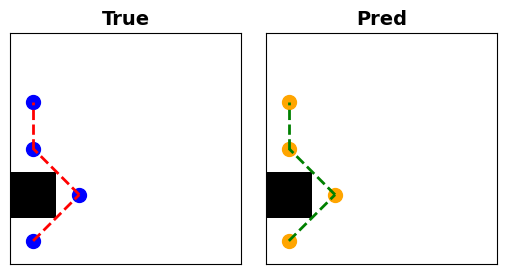

   INFO 2023-11-28 10:26:23: Training set row 1 with


INFO:__main__:Training set row 1 with


Y_true [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


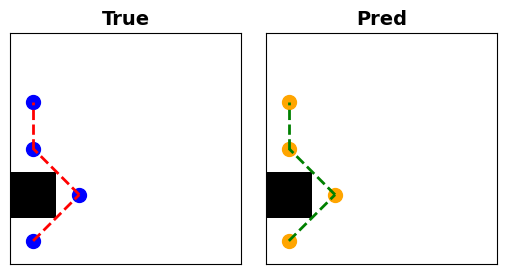

   INFO 2023-11-28 10:26:24: Training set row 2 with


INFO:__main__:Training set row 2 with


Y_true [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


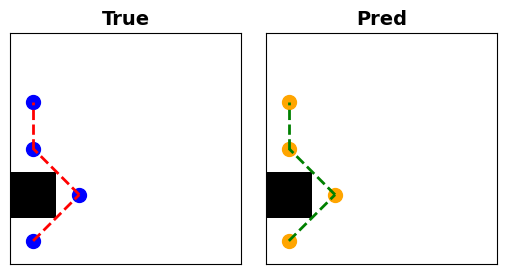

In [ ]:
##==========================================##
##  Plot some predictions on training data  ##
##==========================================##

num_print = min([3, len(train_X)])
print("train_X",train_X)
train_Y_predictions = model.predict(train_X[:num_print], verbose=0)
for row_idx in range(num_print) :
    logger.info(f"Training set row {row_idx} with")
    logger.debug(f"Y_TRUE =\n{train_Y[row_idx]}\n")
    logger.debug(f"Y_PRED =\n{train_Y_predictions[row_idx]}\n")
    plot_maps(train_Y[row_idx], train_Y_predictions[row_idx], train_X[row_idx])


   INFO 2023-11-28 10:26:29: Validationn set row 0 with


INFO:__main__:Validationn set row 0 with


val_Y_predictions[row_idx] [[1.5386434e-04 9.9782574e-01 9.9559096e-05 9.8607175e-05 3.2976959e-04]
 [4.0685576e-05 7.4469681e-05 4.1957890e-05 3.1208219e-05 3.4991303e-05]
 [3.3955548e-05 6.3621184e-05 4.4045268e-05 3.7852704e-05 3.5829202e-05]
 [3.1796819e-05 1.0535962e-04 4.4460099e-05 4.6641027e-05 7.1366325e-05]
 [4.6436653e-05 7.5583630e-05 6.9888163e-05 5.5608376e-05 1.0352653e-04]]
Y_true [[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


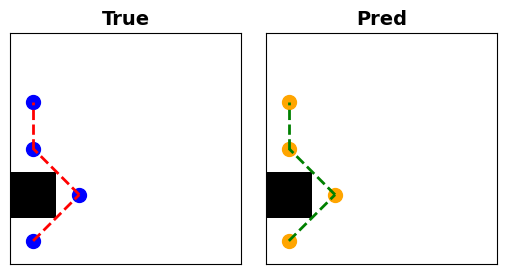

In [ ]:
##============================================##
##  Plot some predictions on validation data  ##
##============================================##

num_print = min([3, len(val_X)])
val_Y_predictions = model.predict(val_X[:num_print], verbose=0)
for row_idx in range(num_print) :
    logger.info(f"Validationn set row {row_idx} with")
    logger.debug(f"Y_TRUE =\n{val_Y[row_idx]}\n")
    logger.debug(f"Y_PRED =\n{val_Y_predictions[row_idx]}\n")
    print("val_Y_predictions[row_idx]",val_Y_predictions[row_idx])
    plot_maps(val_Y[row_idx], val_Y_predictions[row_idx], val_X[row_idx])